# Arbitrary Waveform

<a href="https://rookiepeng.github.io/radarsimpy/" target="_blank" rel="nofollow"><img src="https://img.shields.io/badge/Documentation-latest-brightgree?style=flat&logo=read-the-docs" height="20" align="left"></a>

<br></br>
[`RadarSimPy`](https://github.com/rookiepeng/radarsimpy) supports the simulation of any arbitrary waveforms. You can specify the waveform by defining the frequency versus time curve. One of the example of using the arbitrary waveform feature is simulating the effect on a non-linear chirp in an FMCW radar.

## Radar Model

### Non-linear chirp

The chirp can be defined by frequency versus time.

In [1]:
import numpy as np

freq_nonlinear = np.array([
    2.40750000e+10, 2.40760901e+10, 2.40771786e+10, 2.40782654e+10,
    2.40793506e+10, 2.40804341e+10, 2.40815161e+10, 2.40825964e+10,
    2.40836750e+10, 2.40847521e+10, 2.40858275e+10, 2.40869012e+10,
    2.40879734e+10, 2.40890439e+10, 2.40901127e+10, 2.40911800e+10,
    2.40922456e+10, 2.40933096e+10, 2.40943719e+10, 2.40954326e+10,
    2.40964917e+10, 2.40975491e+10, 2.40986049e+10, 2.40996591e+10,
    2.41007117e+10, 2.41017626e+10, 2.41028119e+10, 2.41038595e+10,
    2.41049055e+10, 2.41059499e+10, 2.41069927e+10, 2.41080338e+10,
    2.41090733e+10, 2.41101111e+10, 2.41111473e+10, 2.41121819e+10,
    2.41132149e+10, 2.41142462e+10, 2.41152759e+10, 2.41163039e+10,
    2.41173304e+10, 2.41183552e+10, 2.41193783e+10, 2.41203999e+10,
    2.41214198e+10, 2.41224380e+10, 2.41234546e+10, 2.41244696e+10,
    2.41254830e+10, 2.41264947e+10, 2.41275048e+10, 2.41285133e+10,
    2.41295202e+10, 2.41305254e+10, 2.41315289e+10, 2.41325309e+10,
    2.41335312e+10, 2.41345298e+10, 2.41355269e+10, 2.41365223e+10,
    2.41375161e+10, 2.41385082e+10, 2.41394987e+10, 2.41404876e+10,
    2.41414748e+10, 2.41424605e+10, 2.41434444e+10, 2.41444268e+10,
    2.41454075e+10, 2.41463866e+10, 2.41473640e+10, 2.41483399e+10,
    2.41493140e+10, 2.41502866e+10, 2.41512575e+10, 2.41522268e+10,
    2.41531945e+10, 2.41541605e+10, 2.41551249e+10, 2.41560876e+10,
    2.41570488e+10, 2.41580083e+10, 2.41589661e+10, 2.41599224e+10,
    2.41608770e+10, 2.41618299e+10, 2.41627812e+10, 2.41637309e+10,
    2.41646790e+10, 2.41656254e+10, 2.41665702e+10, 2.41675134e+10,
    2.41684550e+10, 2.41693949e+10, 2.41703331e+10, 2.41712698e+10,
    2.41722048e+10, 2.41731381e+10, 2.41740699e+10, 2.41750000e+10])
t_nonlinear = np.linspace(0, 80e-6, 100)

Plot the non-linear chirp

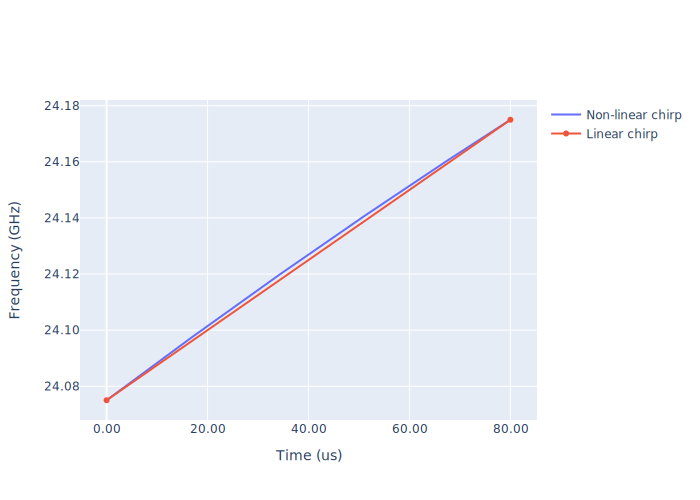

In [2]:
import plotly.graph_objs as go
from IPython.display import SVG, display

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.linspace(0, 80e-6, 100)*1e6,
    y=freq_nonlinear/1e9,
    name='Non-linear chirp',
))

fig.add_trace(go.Scatter(
    x=np.array([0, 80e-6])*1e6,
    y=np.array([24.125e9-50e6, 24.125e9+50e6])/1e9,
    name='Linear chirp',
))

fig.update_layout(
    yaxis=dict(tickformat='.2f', title='Frequency (GHz)'),
    xaxis=dict(tickformat='.2f', title='Time (us)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))

### Transmitter

Setup the basic transmitter parameters through `Transmitter` module.

For comparison, we created a linear chirp transmitter and a non-linear chirp transmitter.

In [3]:
from radarsimpy import Radar, Transmitter, Receiver

tx_channel = dict(
    location=(0, 0, 0),
)

tx_nonlinear = Transmitter(f=freq_nonlinear,
                           t=np.linspace(0, 80e-6, 100),
                           tx_power=40,
                           prp=100e-6,
                           pulses=1,
                           channels=[tx_channel])

tx_linear = Transmitter(f=[24.125e9-50e6, 24.125e9+50e6],
                        t=[0, 80e-6],
                        tx_power=40,
                        prp=100e-6,
                        pulses=1,
                        channels=[tx_channel])

### Receiver

Setup the receiver parameters through `Receiver` module.

The parameters of the receiver are listed in the table below.

 | Parameter                        | Variable in `Receiver`   | Value        |
 |----------------------------------|--------------------------|--------------|
 | Sampling rate ($f_s$)            | `fs`                     | 2 Msps       |
 | Noise figure ($NF$)              | `noise_figure`           | 12 dB        |
 | RF gain/loss ($G_{rf}$)          | `rf_gain`                | 20 dB        |
 | Load resistor ($R_L$)            | `load_resistor`          | 500 $\Omega$ |
 | Baseband voltage gain ($G_{BB}$) | `baseband_gain`          | 30 dB        |

In [4]:
rx_channel = dict(
    location=(0, 0, 0),
)

rx = Receiver(fs=2e6,
              noise_figure=12,
              rf_gain=20,
              load_resistor=500,
              baseband_gain=30,
              channels=[rx_channel])

 Create the FMCW radar model based on all the parameters defined above.

In [5]:
radar_nonlinear = Radar(transmitter=tx_nonlinear, receiver=rx)
radar_linear = Radar(transmitter=tx_linear, receiver=rx)

 ### Targets
 The propertities of targets are defined here. There are 3 targets in this simulation. The locations of the targets are defined through $(x, y, z)$ coordinates in meters, and the speeds of the targets are defined trough $(v_x, v_y, v_z)$ in $m/s$. The propertites of the targets also includes radar cross-section (RCS (dBsm)) and phase (degree).

In [6]:
target_1 = dict(location=(200, 0, 0), speed=(-5, 0, 0), rcs=30, phase=0)
target_2 = dict(location=(95, 20, 0), speed=(-50, 0, 0), rcs=25, phase=0)
target_3 = dict(location=(30, -5, 0), speed=(-22, 0, 0), rcs=15, phase=0)

targets = [target_1, target_2, target_3]

## Simulate Baseband Signals
 
Use the `simulator` module to simulate the baseband samples. The user can choose between Python engine `simpy` or C++ engine `simc`.

The output baseband data is a 3-D matrix:

$[channels, pulses, ADC~samples]$
 
#### Simulate with C++ engine

In [7]:
from radarsimpy.simulator import simc

data_nonlinear = simc(radar_nonlinear, targets, noise=True)
time_matrix_nonlinear = data_nonlinear['timestamp']
data_matrix_nonlinear = data_nonlinear['baseband']

data_linear = simc(radar_linear, targets, noise=True)
time_matrix_linear = data_linear['timestamp']
data_matrix_linear = data_linear['baseband']

Plot baseband samples

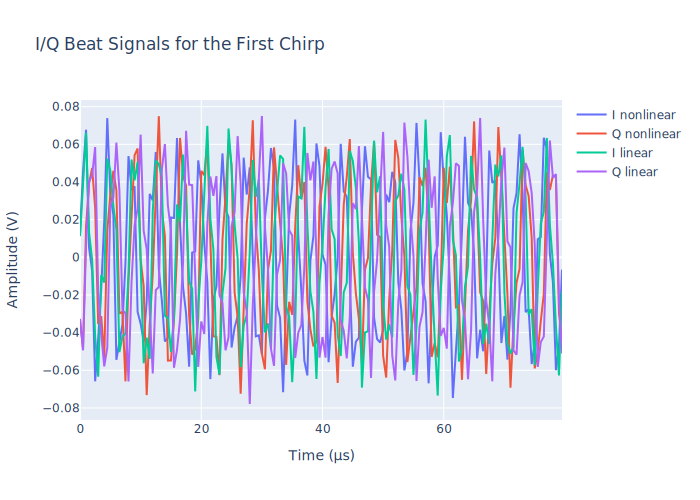

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=time_matrix_nonlinear[0, 0, :] * 1e6,
    y=np.real(data_matrix_nonlinear[0, 0, :]),
    name='I nonlinear',
))
fig.add_trace(go.Scatter(
    x=time_matrix_nonlinear[0, 0, :] * 1e6,
    y=np.imag(data_matrix_nonlinear[0, 0, :]),
    name='Q nonlinear',
))
fig.add_trace(go.Scatter(
    x=time_matrix_linear[0, 0, :] * 1e6,
    y=np.real(data_matrix_linear[0, 0, :]),
    name='I linear',
))
fig.add_trace(go.Scatter(
    x=time_matrix_linear[0, 0, :] * 1e6,
    y=np.imag(data_matrix_linear[0, 0, :]),
    name='Q linear',
))

fig.update_layout(
    title='I/Q Beat Signals for the First Chirp',
    yaxis=dict(title='Amplitude (V)'),
    xaxis=dict(title='Time (µs)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))

 ## Radar Signal Processing
 ### Range profile

In [9]:
from scipy import signal
import radarsimpy.processing as proc

range_window = signal.chebwin(radar_linear.samples_per_pulse, at=60)

range_profile_nonlinear = proc.cal_range_profile(
    radar_nonlinear, data_matrix_nonlinear[:, :, :], range_window)
range_profile_linear = proc.cal_range_profile(
    radar_linear, data_matrix_linear[:, :, :], range_window)

Plot the range profile

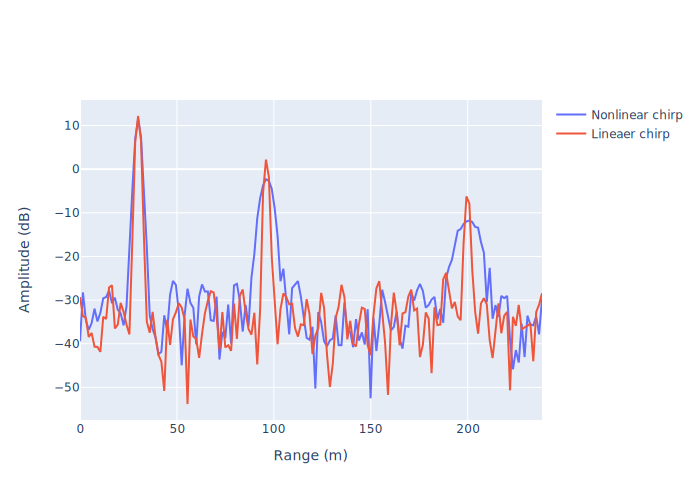

In [10]:
range_axis = np.linspace(
    0, radar_linear.max_range, radar_linear.samples_per_pulse, endpoint=False)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=range_axis,
    y=20 * np.log10(np.abs(range_profile_nonlinear[0, 0, :])),
    name='Nonlinear chirp',
))

fig.add_trace(go.Scatter(
    x=range_axis,
    y=20 * np.log10(np.abs(range_profile_linear[0, 0, :])),
    name='Lineaer chirp',
))

fig.update_layout(
    yaxis=dict(title='Amplitude (dB)'),
    xaxis=dict(title='Range (m)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))